In [1]:
import numpy as np
import pandas as pd
from clickbait import *

### Get paths of clickbait sessions.

In [2]:
# Where to look for clickbait datasets
data_dir = f'A:/Clickbait/'

# Get session and filenames for directories with .avi files greater than 1gb
mice, sessions, files = scan_dataset(data_dir, min_size_bytes=1e9, filetype='.avi')

print(f"Located {len(mice)} sessions.")

## Print mouse and session names
# for ii in range(len(mice)):
#     print(f"{mice[ii]}-{sessions[ii]}")

Located 51 sessions.


### Initialize dataset object.

In [3]:
# Initialize experiment class
clickbait = BehaviorExperiment(data_dir=data_dir)

### Load sessions into dataset object.

In [4]:
# Load all sessions
clickbait.load_all_sessions(mice, sessions, files)

In [5]:
# Test syntax
# len(clickbait.sessions['1006_full4'].video_ts)

### Build Summary Dataframe


In [6]:
# Build summary dataframe
clickbait.build_summary_df(mice, sessions)
clickbait.summary_df

,mouse_id,session_id,session_number,avg_velocity,distance_traveled,trials_completed
0,1003,diet1,1,5.007283,691530.880468,72
1,1003,diet2,2,4.062164,559843.432625,66
2,1003,diet3,3,4.253292,587447.743952,87
3,1003,diet4,4,4.382331,585847.602872,83
4,1003,full1,5,4.724145,627016.882824,49
5,1003,full2,6,6.942450,895881.532906,112
6,1003,full3,7,5.386913,697874.629723,86
7,1003,full4,8,5.599699,773385.640592,91
8,1003,full5,9,5.655667,769232.860689,96
9,1003,full6,10,5.146586,708288.543977,89


In [7]:
# Get a specific session
idx = 31
mouse = mice[idx]
session = sessions[idx]

session = clickbait.get_session(mouse, session)

# Get session info
session.print_session_info()

# View session attributes
#vars(session)

Mouse: 1005 Session: diet6
Trials Completed: 116
Video length: 122475 frames
Events Data Length: 122475 rows
Video length at 50.6 FPS: 40.34 minutes


### Visualize Summary Data

In [9]:
linear_regression_plot(clickbait.summary_df, dv='trials_completed', iv='session_number', dv_name='Trials Completed', iv_name='Session Number', error_type='SEM')

In [10]:
linear_regression_plot(clickbait.summary_df, dv='distance_traveled', iv='session_number', dv_name='Distance Traveled', iv_name='Session Number', error_type='SEM')

### Visualize trials completed for individual mice.

In [11]:
# Make a subset of the summary dataframe for a specific mouse
for mouse_id in set(mice):
    #mouse_id = '1003'
    mouse_df = clickbait.summary_df[clickbait.summary_df['mouse_id'] == mouse_id]
    #mouse_df = mouse_df[mouse_df['session_id'].str.contains('diet')]   

    linear_regression_plot(mouse_df, dv='trials_completed', iv='session_number', dv_name='Trials Completed', iv_name=f"Session Number<br><b>Mouse {mouse_id}</b>", error_type='SEM')

### Visualize distance traveled for individual mice.

In [12]:
# Make a subset of the summary dataframe for a specific mouse
for mouse_id in set(mice):
    #mouse_id = '1003'
    mouse_df = clickbait.summary_df[clickbait.summary_df['mouse_id'] == mouse_id]
    #mouse_df = mouse_df[mouse_df['session_id'].str.contains('full')]   

    linear_regression_plot(mouse_df, dv='distance_traveled', iv='session_number', dv_name='Distance Traveled', iv_name='Session Number', error_type='SEM')

### Heatmaps

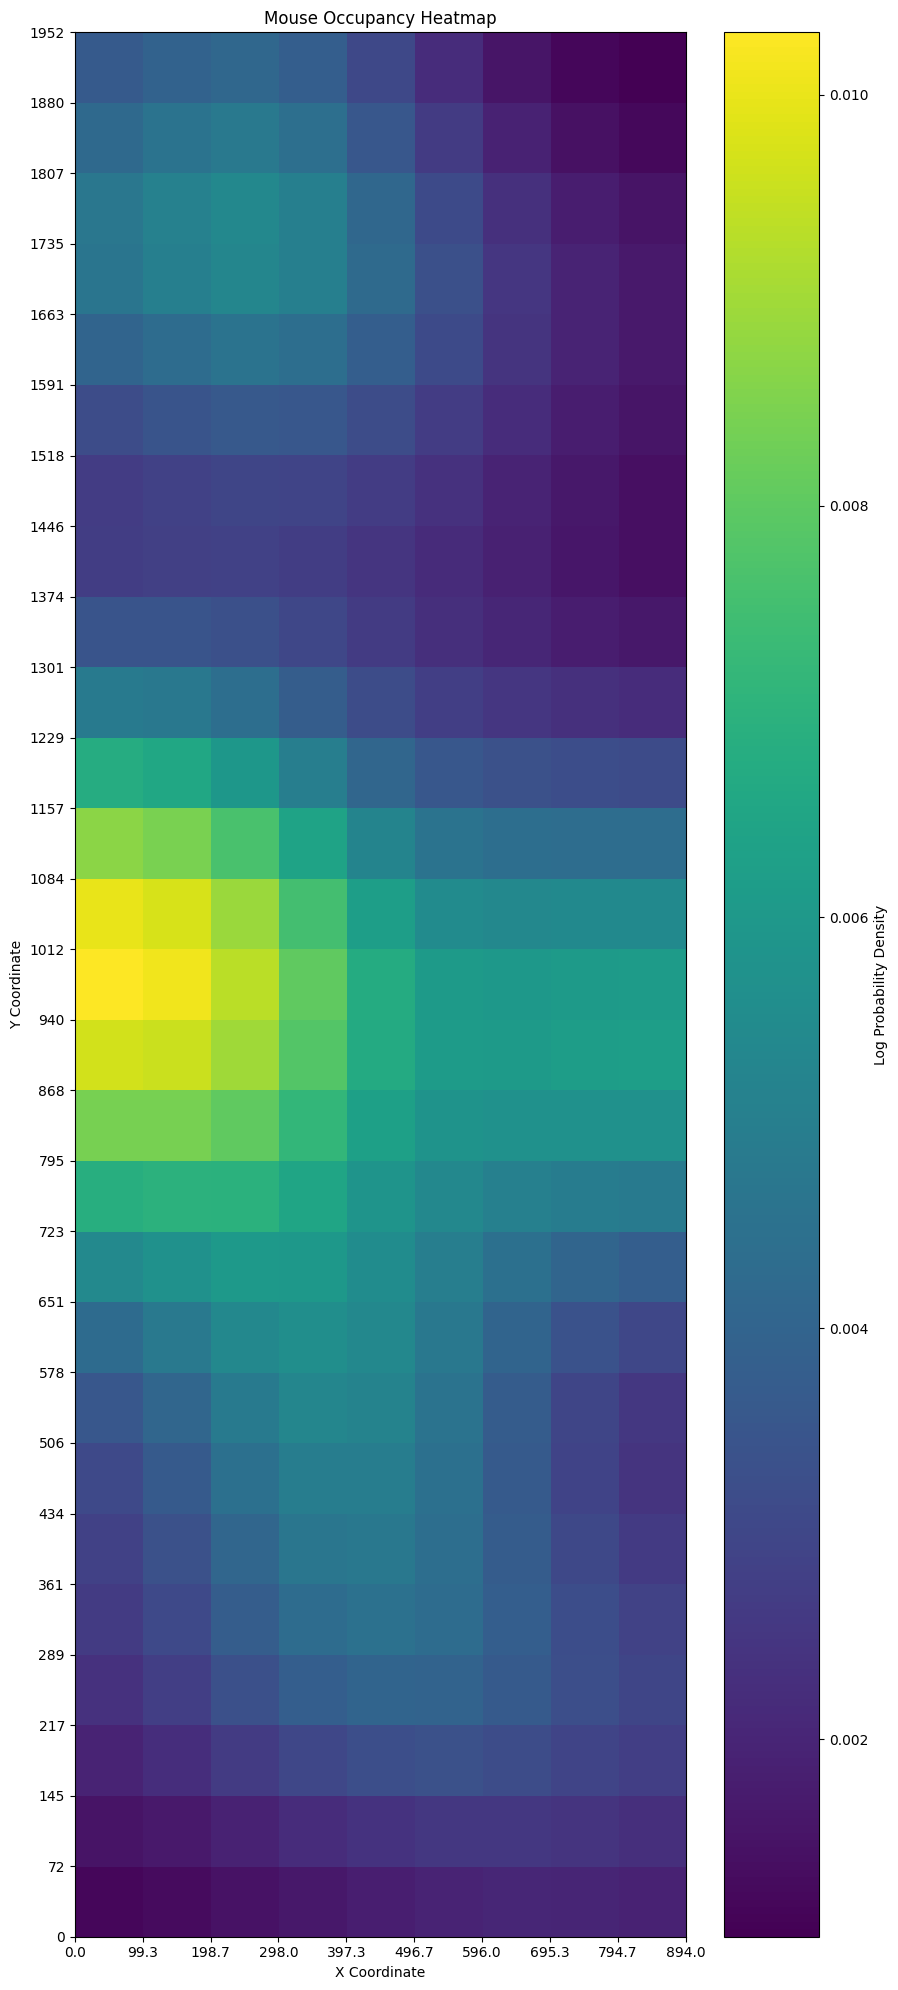

In [22]:
# Visualize occupancy heatmap
mouse = 1006
session = 'diet2'
session = clickbait.get_session(mouse, session)
visualize_occupancy_heatmap(session.event_data, grid_x=9, grid_y=27, dim_x=894, dim_y=1952, log_scale=True, normalize=True)

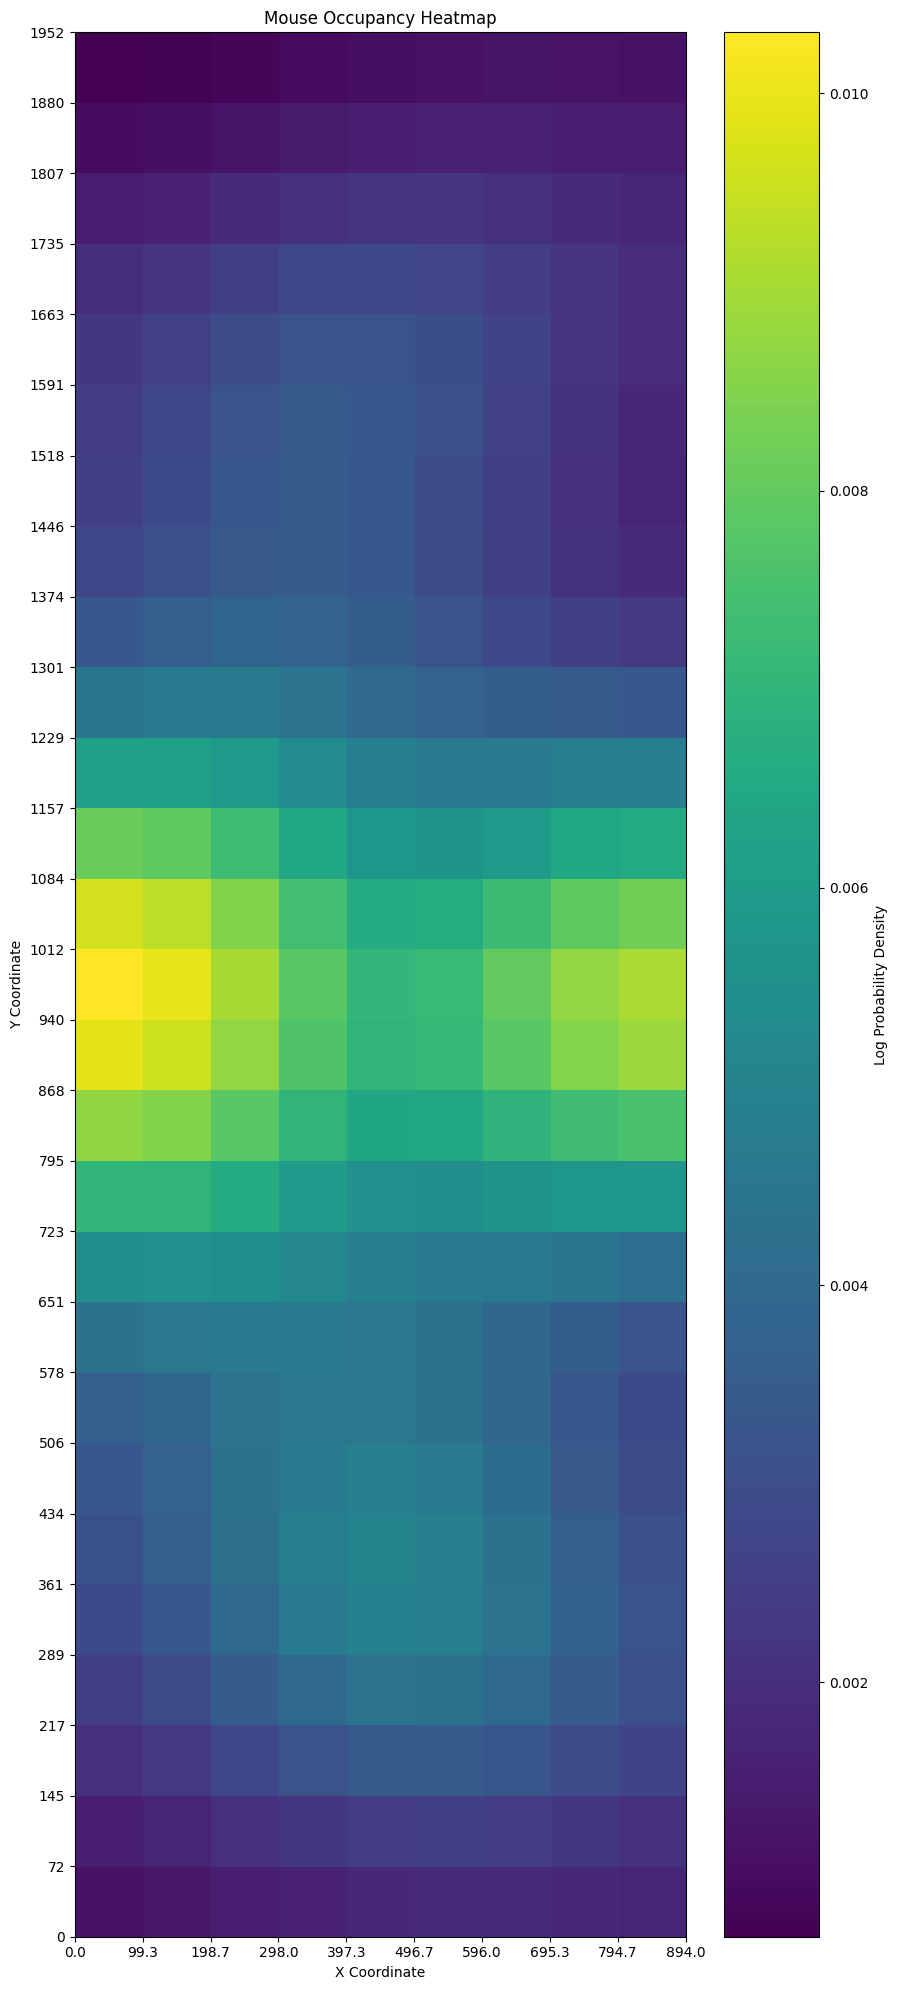

In [23]:
# Visualize occupancy heatmap
mouse = 1006
session = 'full7'
session = clickbait.get_session(mouse, session)
visualize_occupancy_heatmap(session.event_data, grid_x=9, grid_y=27, dim_x=894, dim_y=1952, log_scale=True, normalize=True)